# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

Processing ./ait_sdk-0.1.7-py3-none-any.whl
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached numpy-1.19.3-cp36-cp36m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached psutil-5.7.3-cp36-cp36m-linux_x86_64.whl
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached PyYAML-5.4.1-cp36-cp36m-manylinux1_x86_64.whl (640 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached testpath-0.4.4-py2.py3-none-any.whl (163 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached pandocfilters-1.4.3-py3-none-any.whl
  Using cached bleach-3.3.0-py2.py3-none-any.whl (283 kB)
  Using cached jupyter_core-4.7.1-py3-none-any.whl (82 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached nbclient-0.5.3-py3-none-any.whl (82 kB

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator._package_list = []
    requirements_generator.add_package('matplotlib', '3.3.0')
    requirements_generator.add_package('numpy', '1.19.2')
    requirements_generator.add_package('pandas', '1.1.0')
    requirements_generator.add_package('scikit-learn', '0.23.2')
    requirements_generator.add_package('scipy', '1.4.1')
    requirements_generator.add_package('seaborn', '0.10.1')
    requirements_generator.add_package('sklearn', '0.0')
    requirements_generator.add_package('tensorflow', '2.4.0')
    requirements_generator.add_package('tensorflow-estimator', '2.4.0')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.7-py3-none-any.whl
  Using cached numpy-1.19.2-cp36-cp36m-manylinux2010_x86_64.whl (14.5 MB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl (2.9 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled n

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
from typing import List
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import interp
from itertools import cycle
from os import makedirs, path

from ait_sdk.utils import get_summary_text
from ait_sdk.utils.mnist import MNIST
from ait_sdk.utils.acc_calculator import ACCCalculator

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_adversarial_example_acc_test_tf2.3')
    manifest_genenerator.set_ait_description('''
    Fast gradient sign method to create a hostile sample and measure its accuracy.\n\n
    <QualityMeasurement>\n
    Accuracy=TP+TNTP+FP+FN+TN\n
    Precision=TPTP+FP\n
    Recall=TPTP+FN\n
    F−measure=2Recall∗PrecisionRecall+Precision\n
    AUC\n\n<Resources>\n
    ROC曲線\n
    混同行列
    ''')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Robustness_of_trained_model')
    manifest_genenerator.set_ait_reference('')

    manifest_genenerator.add_ait_inventories(name='trained_model', 
                                             type_='model', 
                                             description='Tensorflow 2.3で学習したモデル', 
                                             format_=['h5'], 
                                             schema='https://support.hdfgroup.org/HDF5/doc/')
    manifest_genenerator.add_ait_inventories(name='test_set_images', 
                                            type_='dataset', 
                                            description='テスト画像セット（MNISTフォーマット）', 
                                            format_=['gz'], 
                                            schema='http://yann.lecun.com/exdb/mnist/')
    manifest_genenerator.add_ait_inventories(name='test_set_labels', 
                                            type_='dataset', 
                                            description='テスト画像ラベル（MNISTフォーマット）', 
                                            format_=['gz'], 
                                            schema='http://yann.lecun.com/exdb/mnist/')

    manifest_genenerator.add_ait_parameters(name='epsilon', 
                                            type_='float', 
                                            description='adversarial example perturbation', 
                                            default_val='0.01',
                                            min_value='0')
    manifest_genenerator.add_ait_parameters(name='class_count', 
                                            type_='int', 
                                            description='multiple classification class number', 
                                            default_val='10',
                                            min_value='1')
    manifest_genenerator.add_ait_parameters(name='image_px_size', 
                                            type_='int', 
                                            description='prediction image pixel size', 
                                            default_val='28',
                                            min_value='28',
                                            max_value='28')
    manifest_genenerator.add_ait_parameters(name='auc_average', 
                                            type_='string', 
                                            description='{‘micro’, ‘macro’, ‘samples’, ‘weighted’}\r\nref:\r\nhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html', 
                                            default_val='macro')
    manifest_genenerator.add_ait_parameters(name='auc_multi_class', 
                                            type_='string', 
                                            description='{‘raise’, ‘ovr’, ‘ovo’}\nref:\nhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html', 
                                            default_val='raise')

    manifest_genenerator.add_ait_measures(name='Accuracy', 
                                          type_='float', 
                                          description='(TP+TN) / (TP+FP+FN+TN)', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='Precision', 
                                          type_='float', 
                                          description='TP / (TP+FP)', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='Recall', 
                                          type_='float', 
                                          description='TP / (TP+FN)', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='F−measure', 
                                          type_='float', 
                                          description='(2Recall∗Precision) / (Recall+Precision)', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='AUC', 
                                          type_='float', 
                                          description='Area under the ROC curve', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='AccuracyByClass', 
                                          type_='float', 
                                          description='Accuracy for each class.', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='PrecisionByClass', 
                                          type_='float', 
                                          description='Precision for each class.', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='RecallByClass', 
                                          type_='float', 
                                          description='Recall for each class.', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='F−measureByClass', 
                                          type_='float', 
                                          description='F−measure for each class.', 
                                          structure='sequence',
                                          min='0',
                                          max='1')

    manifest_genenerator.add_ait_resources(name='ConfusionMatrixHeatmap', 
                                           type_='picture', 
                                           description='混同行列(ヒートマップ)')
    manifest_genenerator.add_ait_resources(name='ROC-curve', 
                                           type_='picture', 
                                           description='ROC曲線')

    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_genenerator.add_ait_downloads(name='ConfusionMatrixCSV', 
                                           description='混同行列')
    manifest_genenerator.add_ait_downloads(name='PredictionResult', 
                                           description='ID,正解ラベル,推論結果確率(ラベル毎)')

    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='trained_model',
                                        value='trained_model/model_1.h5')
    input_generator.add_ait_inventories(name='test_set_images',
                                        value='test_set_images/t10k-images-idx3-ubyte.gz')
    input_generator.add_ait_inventories(name='test_set_labels',
                                        value='test_set_labels/t10k-labels-idx1-ubyte.gz')

    input_generator.set_ait_params(name='epsilon',
                                   value='0.1')
    input_generator.set_ait_params(name='class_count',
                                   value='10')
    input_generator.set_ait_params(name='image_px_size',
                                   value='28')
    input_generator.set_ait_params(name='auc_average',
                                   value='macro')
    input_generator.set_ait_params(name='auc_multi_class',
                                   value='raise')

    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################
# 1/8

@log(logger)
@measures(ait_output, 'Accuracy', 'Precision', 'Recall', 'F−measure')
def calc_acc_all(y_test, y_pred) -> (float, float, float, float):
    calc = ACCCalculator()
    one_hot_y = to_categorical(y_test)

    return calc.average_accuracy(one_hot_y, y_pred).numpy() , \
           calc.macro_precision(one_hot_y, y_pred).numpy() , \
           calc.macro_recall(one_hot_y, y_pred).numpy() , \
           calc.macro_f_measure(one_hot_y, y_pred).numpy()

In [12]:
#########################################
# area:functions
# should edit
#########################################
# 2/8

@log(logger)
@measures(ait_output, 'AccuracyByClass', 'PrecisionByClass', 'RecallByClass', 'F−measureByClass', is_many=True)
def calc_acc_by_class( y_test, y_pred) -> (List[float], List[float], List[float], List[float]):
    calc = ACCCalculator()
    one_hot_y = to_categorical(y_test)

    return calc.all_class_accuracy(one_hot_y, y_pred) , \
           [v.numpy() for v in calc.all_class_precision(one_hot_y, y_pred)] , \
           [v.numpy() for v in calc.all_class_recall(one_hot_y, y_pred)] , \
           [v.numpy() for v in calc.all_class_f_measure(one_hot_y, y_pred)]

In [13]:
#########################################
# area:functions
# should edit
#########################################
# 3/8

@log(logger)
@downloads(ait_output, path_helper, 'ConfusionMatrixCSV', 'confusion_matrix.csv')
def save_confusion_matrix_csv(y_test, y_pred, file_path: str=None) -> None:
    cmx_data = confusion_matrix(y_test, K.argmax(y_pred))
    logger.info(cmx_data)
    np.savetxt(file_path, cmx_data, fmt='%d', delimiter=',')

In [14]:
#########################################
# area:functions
# should edit
#########################################
# 4/8

@log(logger)
@resources(ait_output, path_helper, 'ConfusionMatrixHeatmap', 'confusion_matrix.png')
def save_confusion_matrix_heatmap(y_test, y_pred, file_path: str=None) -> None:
    y_pred = K.argmax(y_pred)

    labels = sorted(list(set(y_test)))
    cmx_data = confusion_matrix(y_test, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig = plt.figure(dpi=100, figsize=(8,6))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('Actual class')
    ax.set_title('Plot of Confusion Matrix')

    # save as png
    plt.savefig(file_path)

In [15]:
#########################################
# area:functions
# should edit
#########################################
# 5/8

@log(logger)
@resources(ait_output, path_helper, 'ROC-curve', 'roc_curve.png')
def save_roc_curve(y_test, y_pred, n_classes: int, file_path: str=None) -> None:
    y_true = to_categorical(y_test)
    y_score = y_pred

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(dpi=100, figsize=(8,6))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['#1f77b4',
                    '#ff7f0e',
                    '#2ca02c',
                    '#d62728',
                    '#9467bd',
                    '#8c564b',
                    '#e377c2',
                    '#7f7f7f',
                    '#bcbd22',
                    '#17becf'])

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig(file_path)

In [16]:
#########################################
# area:functions
# should edit
#########################################
# 6/8

@log(logger)
@measures(ait_output, 'AUC')
def calc_auc(y_test, y_pred, multi_class: str, average: str) -> float:
    y_true = to_categorical(y_test)
    y_score = y_pred

    return roc_auc_score(y_true, y_score,
                         multi_class=multi_class,
                         average=average)

In [17]:
#########################################
# area:functions
# should edit
#########################################
# 7/8

@log(logger)
@downloads(ait_output, path_helper, 'PredictionResult', 'prediction.csv')
def save_prediction_result(y_test, y_pred, file_path: str=None) -> None:
    # Label + PredictProva
    out_data = np.hstack([y_test.reshape(y_test.shape[0], 1), y_pred])

    index = [str(i) for i in range(1, y_test.shape[0]+1)]
    columns = ['Label']+[f'PredictionProva_Class_{i}' for i in range(1,y_pred.shape[1]+1)]
    df = pd.DataFrame(data=out_data, index=index, columns=columns, dtype='float')

    df.to_csv(file_path)

In [18]:
#########################################
# area:functions
# should edit
#########################################
# 8/8

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [19]:
def create_adversarial_images(input_images, input_label, model, epsilon):
    loss_object = tf.keras.losses.CategoricalCrossentropy()
    labels = tf.one_hot(input_label, depth=len(np.unique(input_label)), dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_images)
        predictions = model(input_images)
        loss = loss_object(labels, predictions)

        gradient = tape.gradient(loss, input_images) # Get the gradients of the loss w.r.t to the input image.
        signed_grad = tf.sign(gradient) # Get the sign of the gradients to create the perturbation

        adv_image = input_images + epsilon * signed_grad
        adv_image = tf.clip_by_value(adv_image, 0, 1)
  
    return adv_image

In [20]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    image_px_size = ait_input.get_method_param_value('image_px_size')

    # インベントリのMNISTラベル・画像を読み込み
    mnist = MNIST()
    X_test = mnist.load_image(ait_input.get_inventory_path('test_set_images'), image_px_size)
    y_test = mnist.load_label(ait_input.get_inventory_path('test_set_labels'))

    # 前処理として、画像を最大値255で割って0.0 - 1.0に規格化
    X_test_normalize = X_test / 255

    # モデル読み込み
    model = tf.keras.models.load_model(ait_input.get_inventory_path('trained_model'))
    logger.info(get_summary_text(model))
    
    # 敵対的サンプル画像生成
    data_tf = tf.convert_to_tensor(X_test_normalize, np.float32)
    adv_x = create_adversarial_images(data_tf, y_test, model, epsilon=ait_input.get_method_param_value('epsilon'))
    
    # 推論
    y_pred = model.predict(adv_x)

    # 全体精度評価値(measure)
    calc_acc_all(y_test=y_test, y_pred=y_pred)

    # クラス別精度評価値(measure)
    calc_acc_by_class(y_test=y_test, y_pred=y_pred)

    # 混同行列(CSV)
    save_confusion_matrix_csv(y_test=y_test, y_pred=y_pred)

    # 混同行列(PNG)
    save_confusion_matrix_heatmap(y_test=y_test, y_pred=y_pred)

    # ROC曲線(PNG)
    save_roc_curve(y_test=y_test, y_pred=y_pred, 
                    n_classes=ait_input.get_method_param_value('class_count'))

    # AUC(measure)
    calc_auc(y_test=y_test, y_pred=y_pred,
              multi_class=ait_input.get_method_param_value('auc_multi_class'),
              average=ait_input.get_method_param_value('auc_average'))

    # PredictionResult(CSV)
    save_prediction_result(y_test=y_test, y_pred=y_pred)

    # log(Text)
    move_log()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


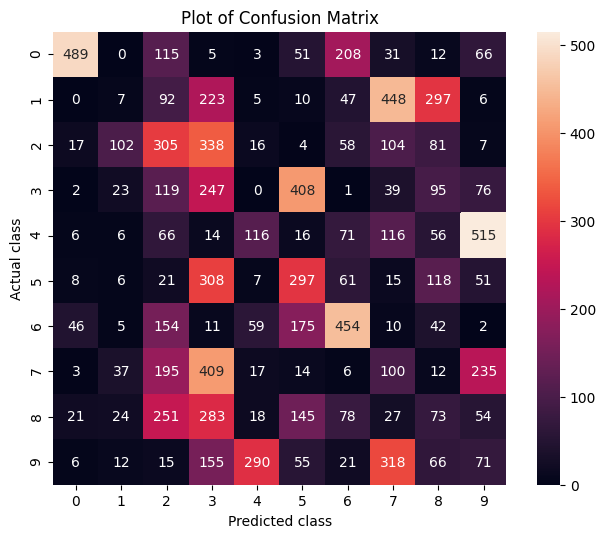

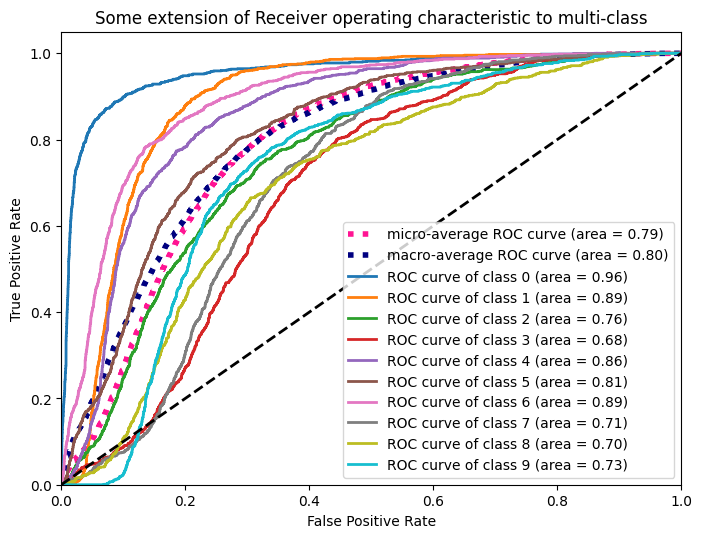

In [21]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [22]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [23]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
